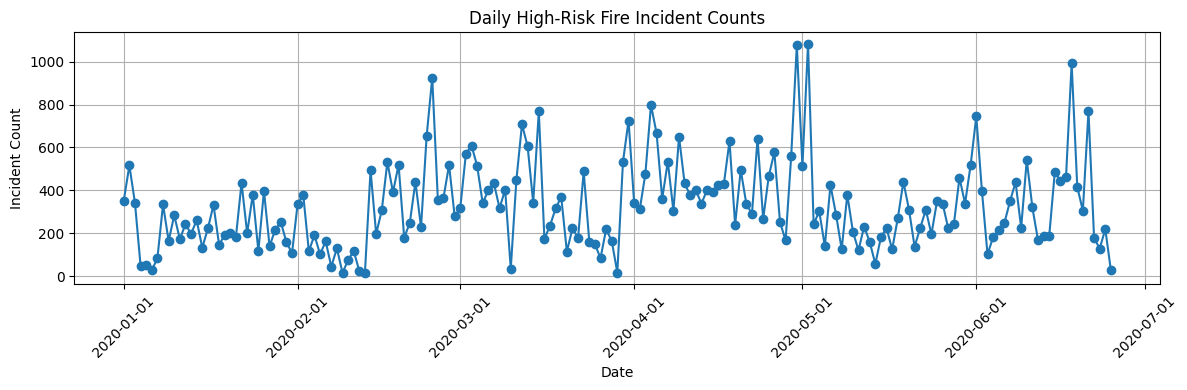

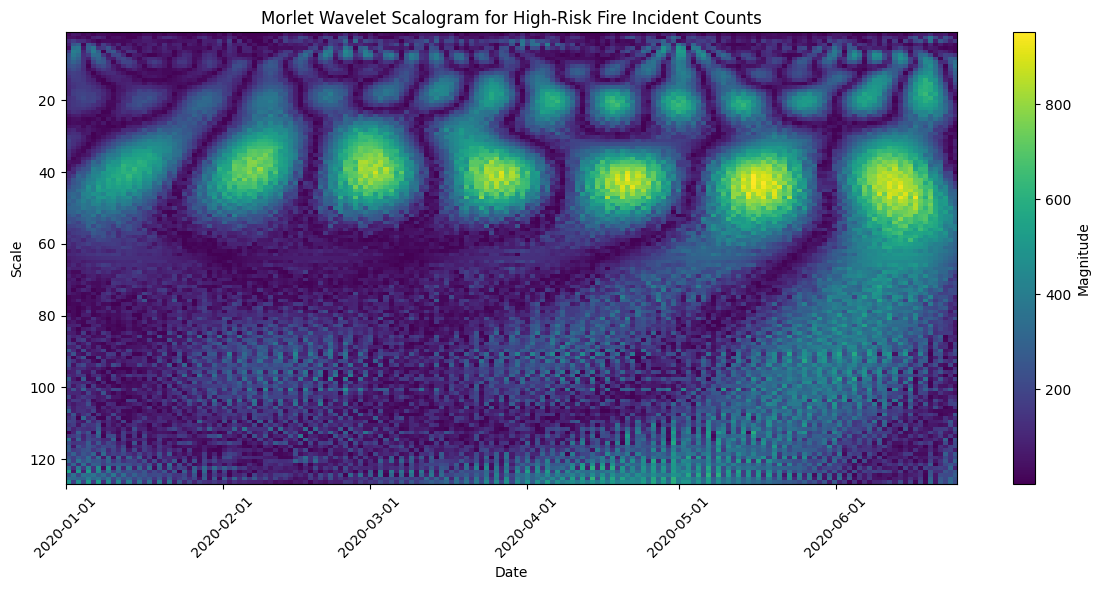

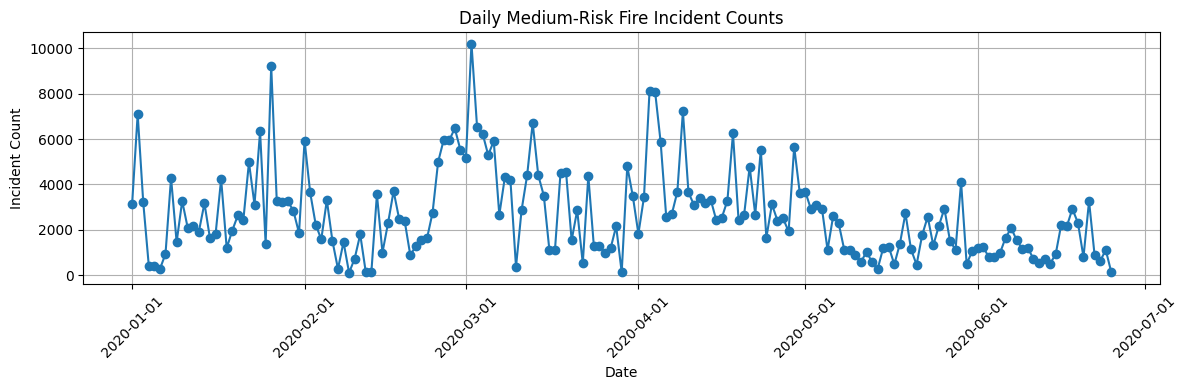

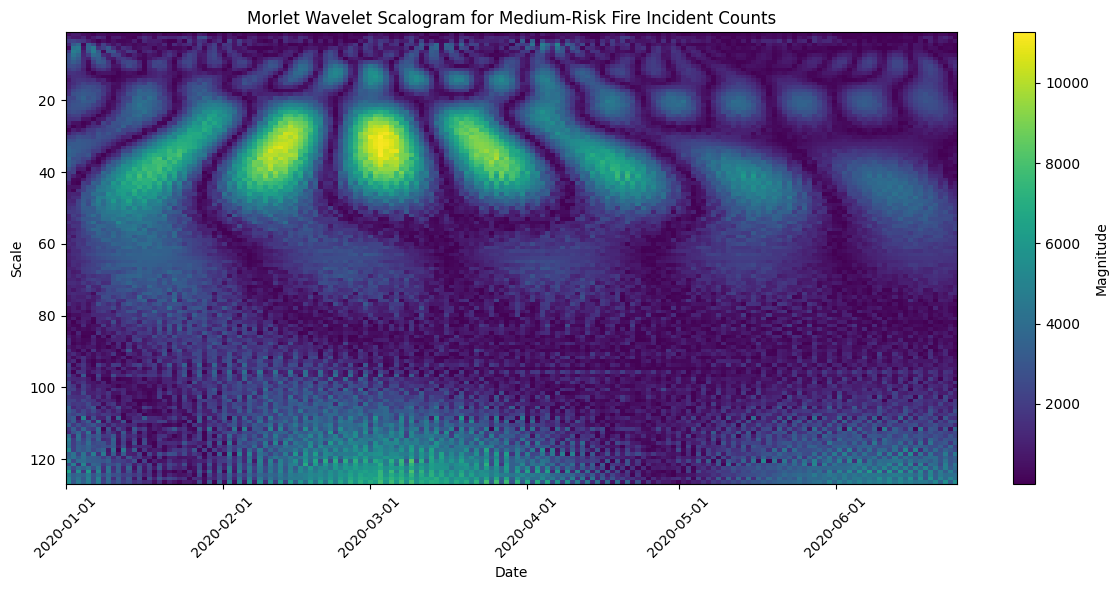

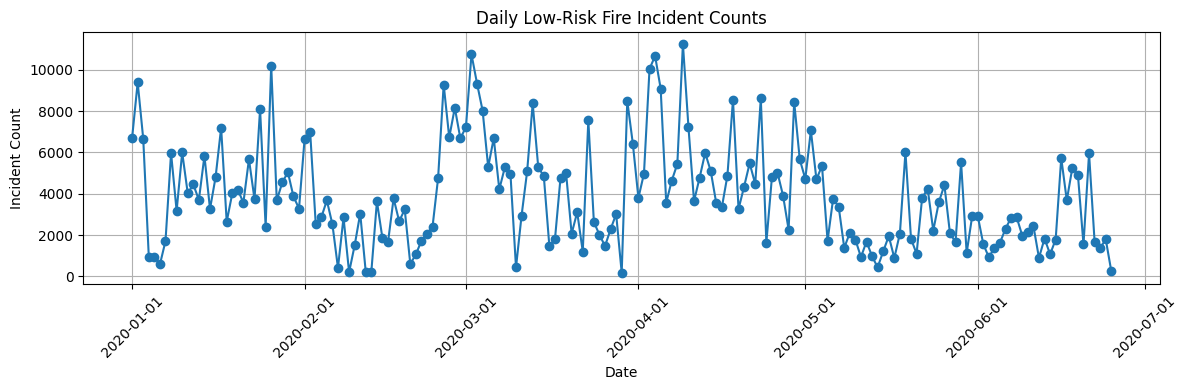

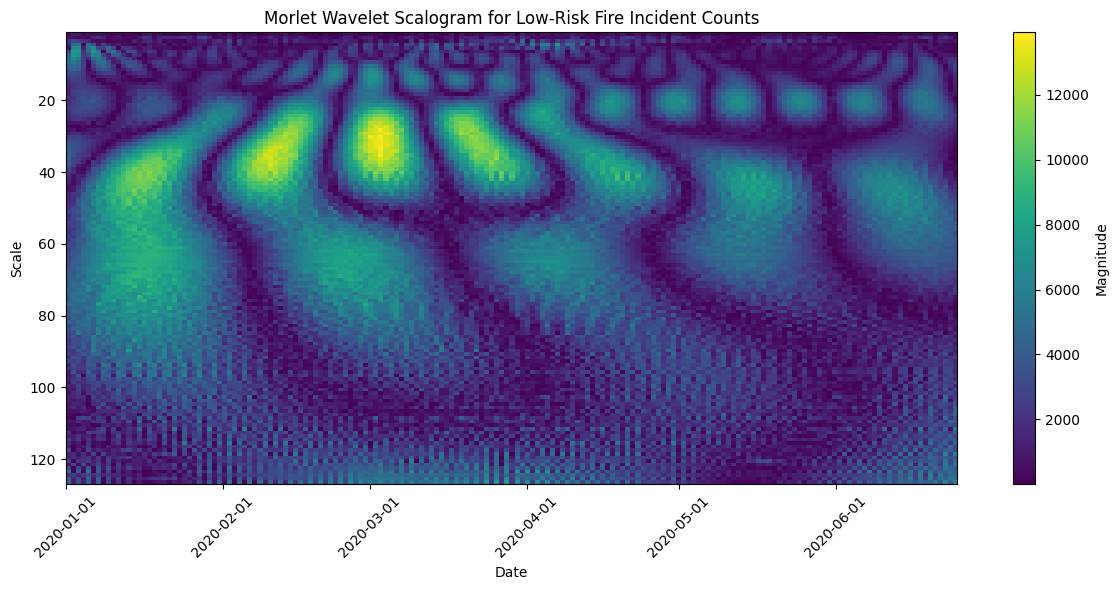

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import matplotlib.dates as mdates

def analyze_dataset(file_name, risk_level, start_date='2020-01-01'):
    df = pd.read_csv(file_name)
    df.columns = df.columns.str.strip()
    df['Datetime'] = pd.date_range(start=start_date, periods=len(df), freq='D')
    df.sort_values('Datetime', inplace=True)
    ts = df.set_index('Datetime')['Count']
    data = ts.values
    time = ts.index
    scales = np.arange(1, 128)
    coefficients, frequencies = pywt.cwt(data, scales, 'morl')

    plt.figure(figsize=(12, 4))
    plt.plot(time, data, marker='o', linestyle='-')
    plt.title(f"Daily {risk_level} Fire Incident Counts")
    plt.xlabel("Date")
    plt.ylabel("Incident Count")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    xmin = mdates.date2num(time[0])
    xmax = mdates.date2num(time[-1])
    plt.imshow(np.abs(coefficients), extent=[xmin, xmax, scales[-1], scales[0]],
               cmap='viridis', aspect='auto')
    plt.title(f"Morlet Wavelet Scalogram for {risk_level} Fire Incident Counts")
    plt.xlabel("Date")
    plt.ylabel("Scale")
    plt.gca().xaxis_date()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.colorbar(label='Magnitude')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_dataset('HighRiskData.csv', 'High-Risk')
analyze_dataset('MediumRiskData.csv', 'Medium-Risk')
analyze_dataset('LowRiskData.csv', 'Low-Risk')
